In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Lotsize: Error Cuadrático Medio (MSE): 11183605790.88, RMSE: 105752.57


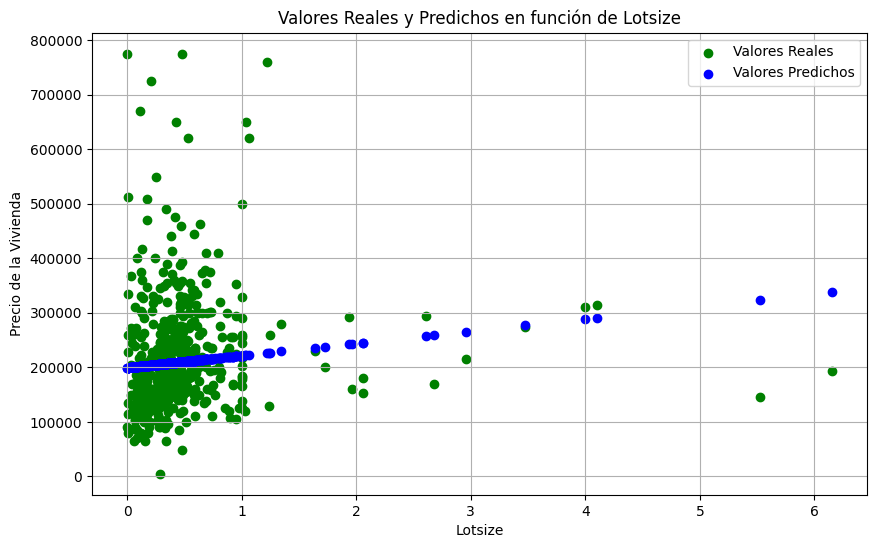

Age: Error Cuadrático Medio (MSE): 11062498814.20, RMSE: 105178.41


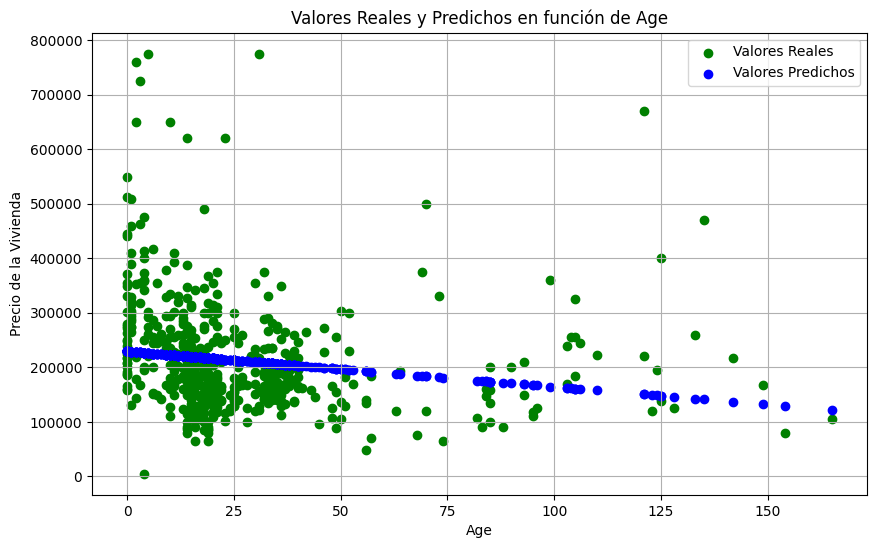

Landvalue: Error Cuadrático Medio (MSE): 7114332127.58, RMSE: 84346.50


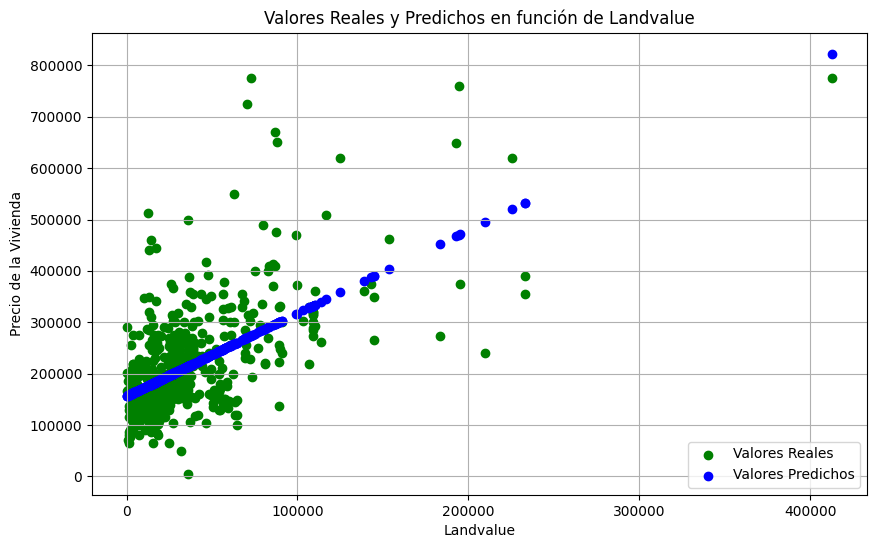

Livingarea: Error Cuadrático Medio (MSE): 5827793426.36, RMSE: 76339.99


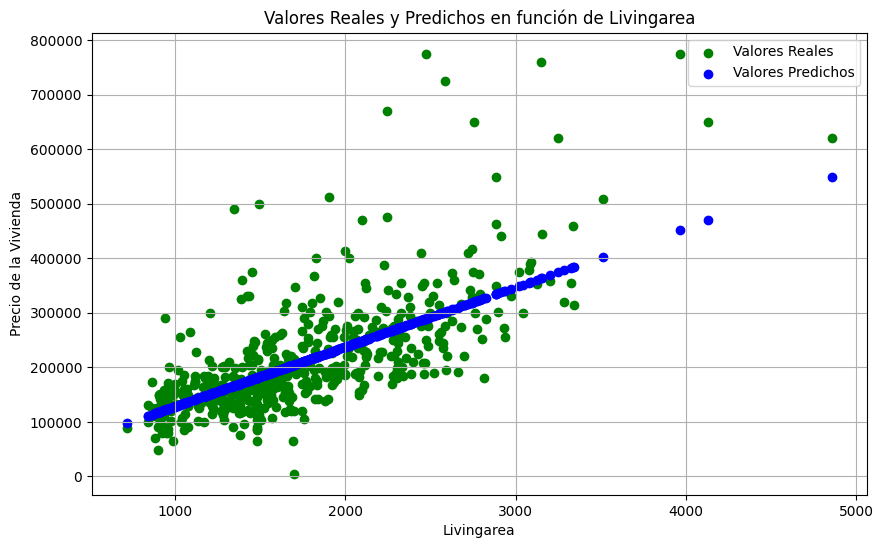

Pctcollege: Error Cuadrático Medio (MSE): 10987742752.08, RMSE: 104822.43


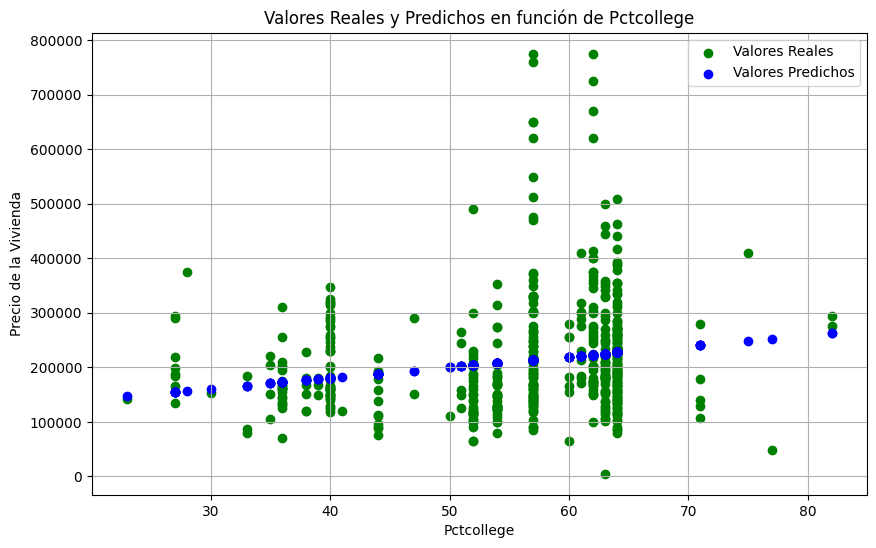

Bedrooms: Error Cuadrático Medio (MSE): 9809592158.29, RMSE: 99043.39


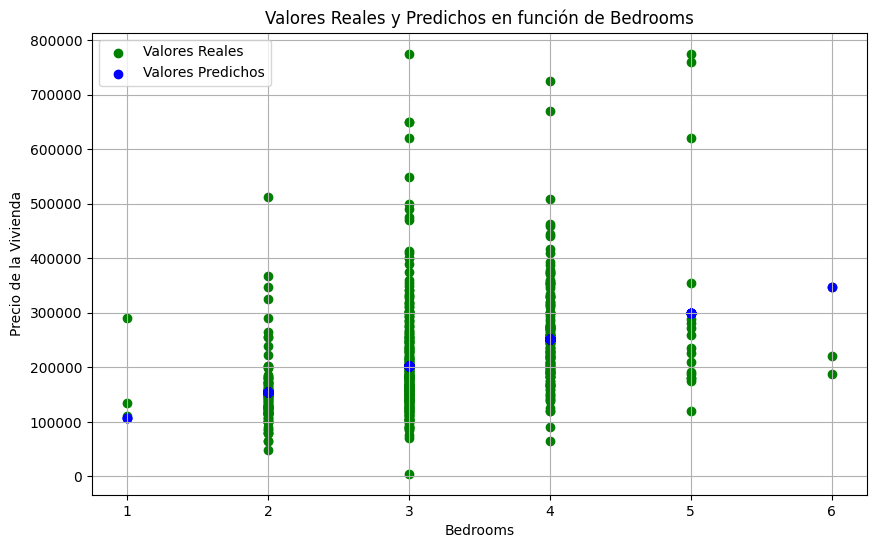

Fireplaces: Error Cuadrático Medio (MSE): 9752715021.65, RMSE: 98755.84


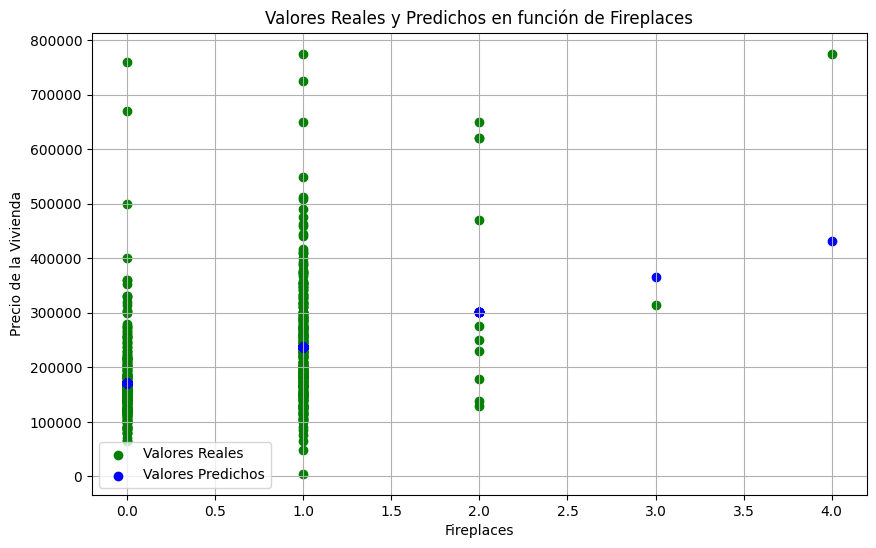

Bathrooms: Error Cuadrático Medio (MSE): 7848929405.93, RMSE: 88594.18


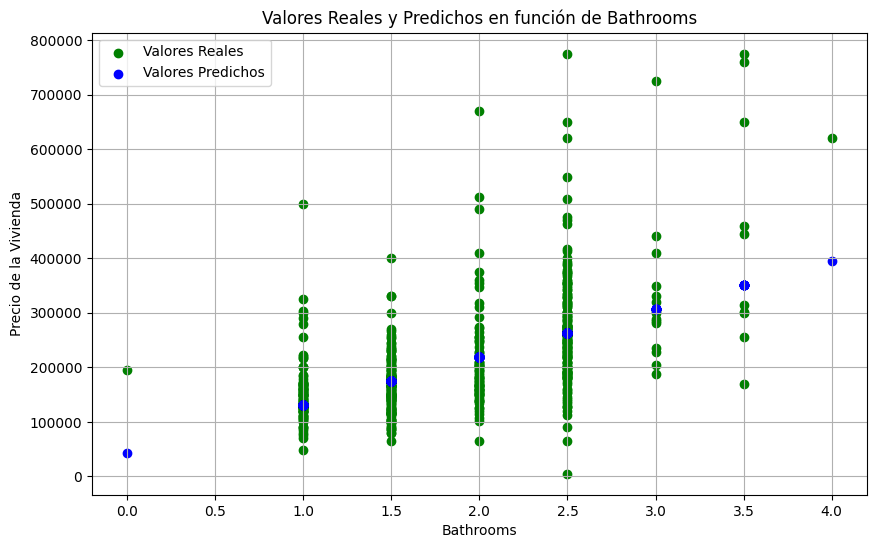

Rooms: Error Cuadrático Medio (MSE): 8410351859.12, RMSE: 91707.97


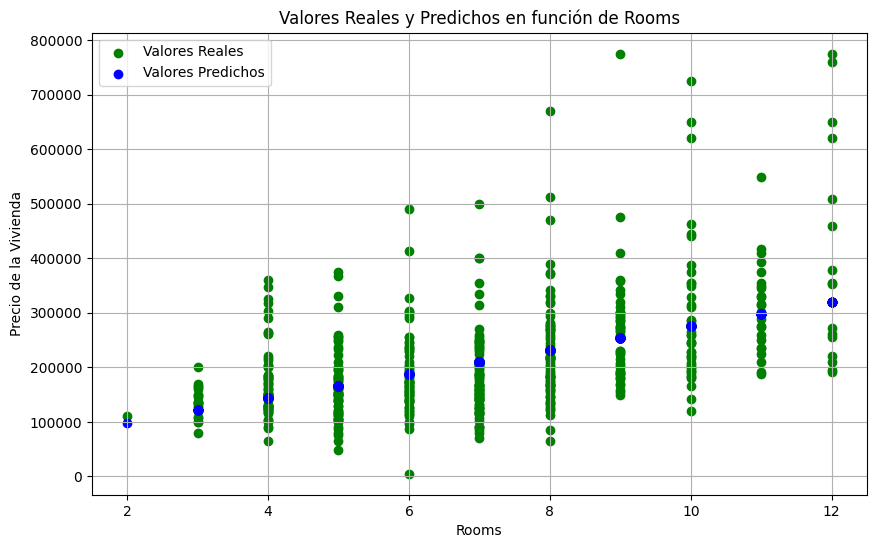

Heating_hot air: Error Cuadrático Medio (MSE): 10884571939.79, RMSE: 104329.15


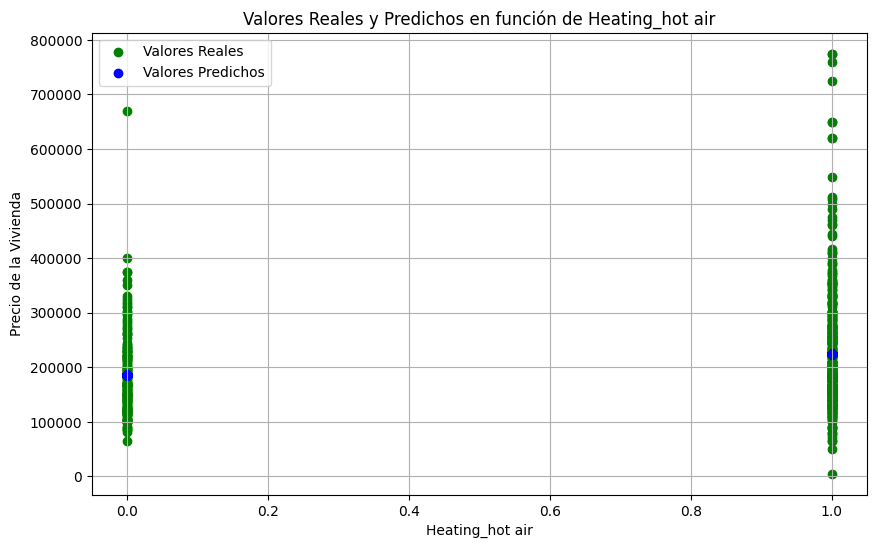

Heating_hot water/steam: Error Cuadrático Medio (MSE): 11322045001.58, RMSE: 106405.10


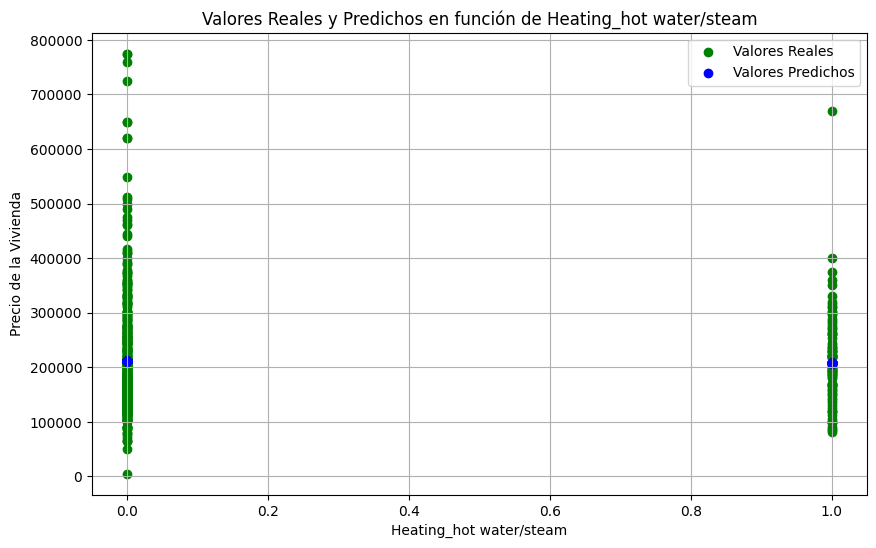

Fuel_gas: Error Cuadrático Medio (MSE): 10739391167.68, RMSE: 103631.03


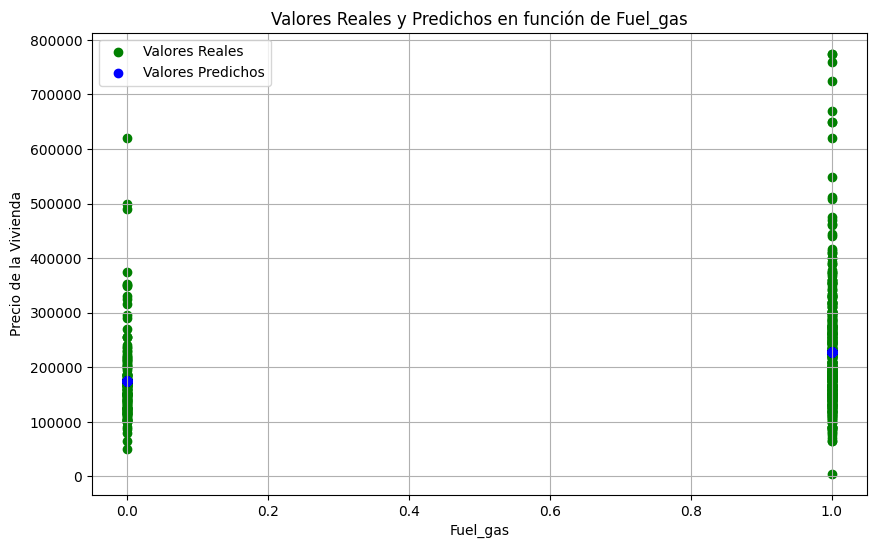

Fuel_oil: Error Cuadrático Medio (MSE): 11331942940.01, RMSE: 106451.60


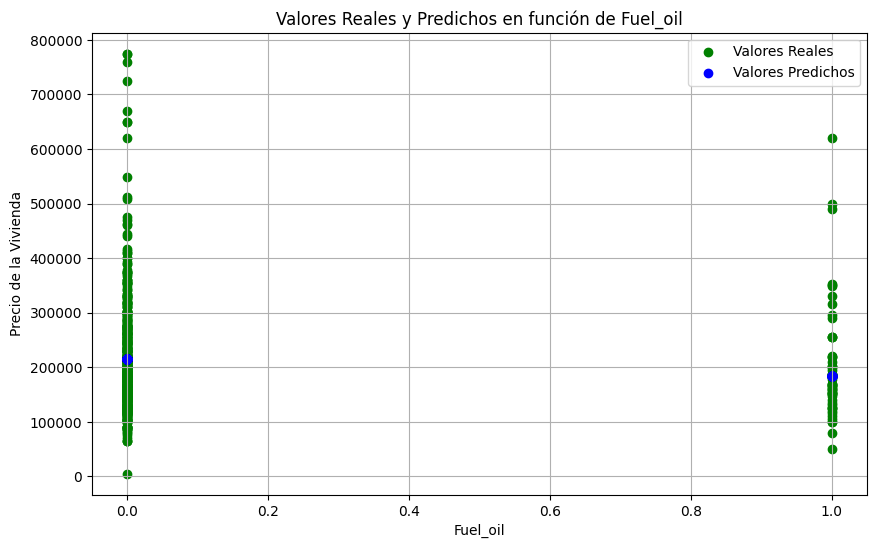

Sewer_public/commercial: Error Cuadrático Medio (MSE): 11383279083.53, RMSE: 106692.45


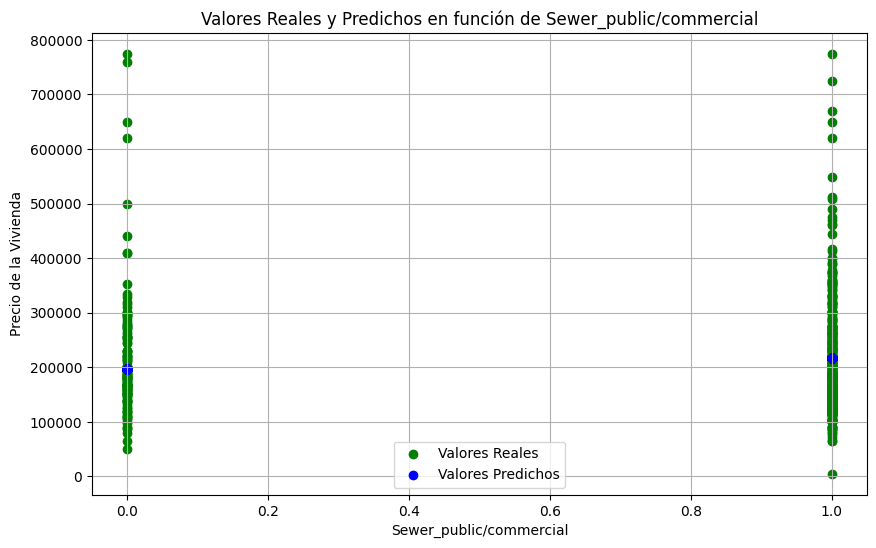

Sewer_septic: Error Cuadrático Medio (MSE): 11402227774.55, RMSE: 106781.21


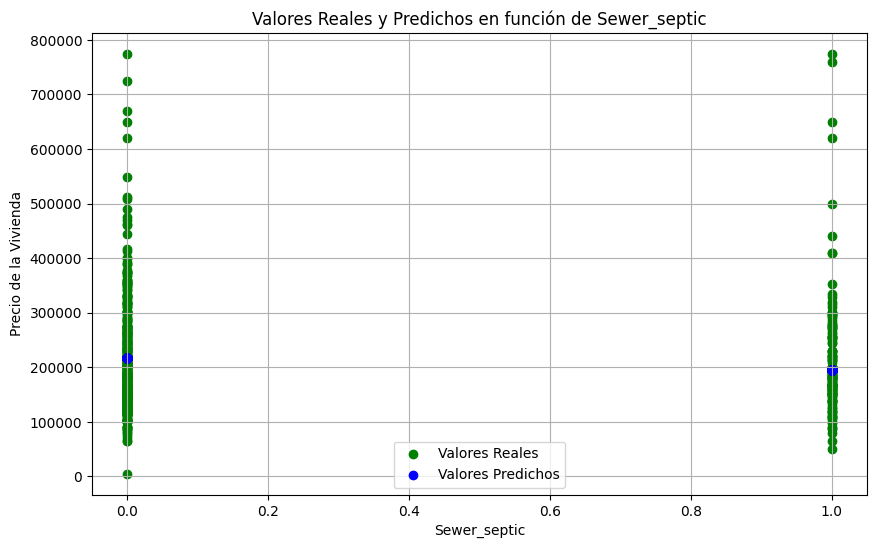

Waterfront_yes: Error Cuadrático Medio (MSE): 10940376669.57, RMSE: 104596.26


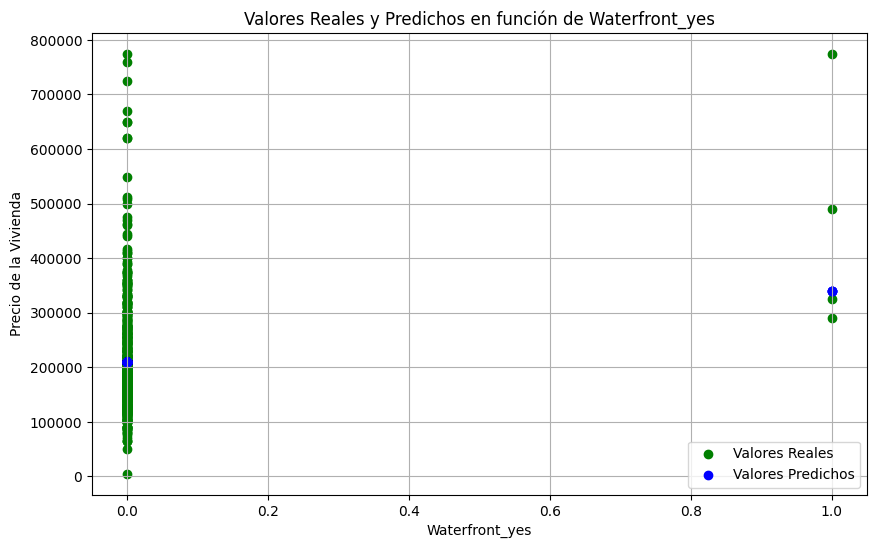

Newconstruction_yes: Error Cuadrático Medio (MSE): 11182100306.43, RMSE: 105745.45


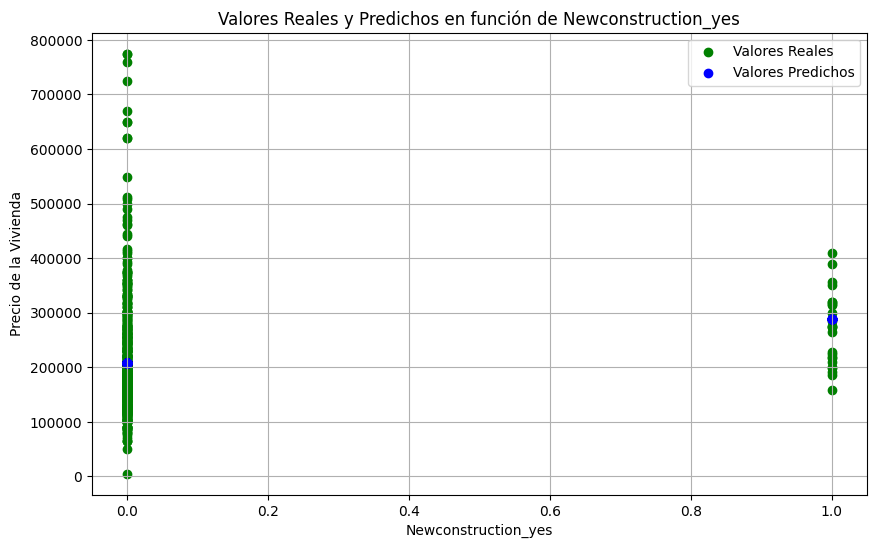

Centralair_yes: Error Cuadrático Medio (MSE): 10466946242.20, RMSE: 102308.09


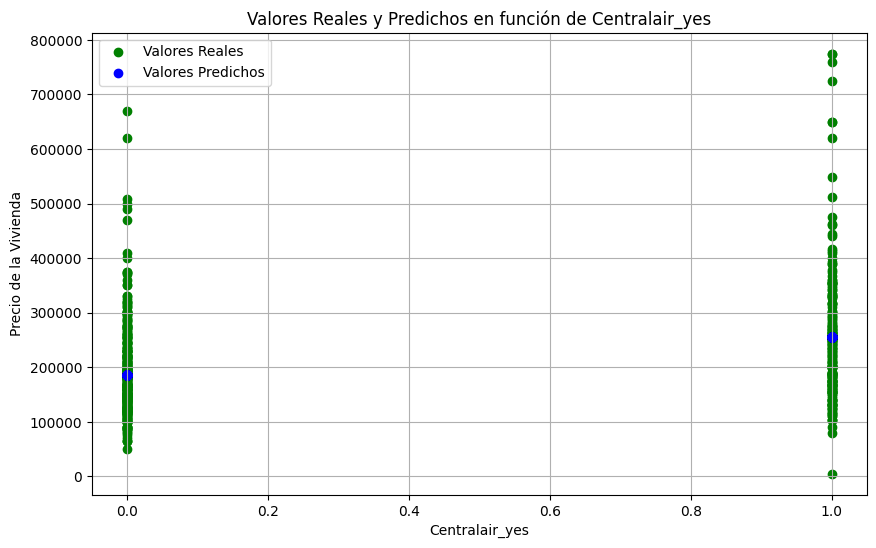

In [17]:
# Cargar el archivo CSV
file_path = '/content/SaratogaHouses.csv'  # Cambia la ruta del archivo
df = pd.read_csv(file_path)

"""
# Convertir variables categóricas a numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir'], drop_first=True)

# Definir las variables independientes (X) y la variable dependiente (y)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
"""

"""
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
"""
# Convertir variables categóricas a numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['heating', 'fuel', 'sewer', 'waterfront', 'newConstruction', 'centralAir'], drop_first=True)

# Definir la variable dependiente (y)
y = df_encoded['price']

# Lista de características independientes
features = df_encoded.columns.drop('price')

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_encoded[features], y, test_size=0.3, random_state=42)

# Bucle para entrenar el modelo y graficar para cada característica
for feature in features:
    # Definir la variable independiente actual
    X_feature_train = X_train[feature]
    X_feature_test = X_test[feature]

    # Ajustar la regresión lineal usando numpy.polyfit (mínimos cuadrados)
    coef = np.polyfit(X_feature_train, y_train, 1)

    # Hacer predicciones en el conjunto de prueba
    y_pred = np.polyval(coef, X_feature_test)

    # Calcular el error cuadrático medio (MSE) y la raíz cuadrática media (RMSE)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{feature.capitalize()}: Error Cuadrático Medio (MSE): {mse:.2f}, RMSE: {rmse:.2f}")

    # Graficar la característica contra el precio
    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature_test, y_test, color='green', label='Valores Reales')
    plt.scatter(X_feature_test, y_pred, color='blue', label='Valores Predichos')
    plt.title(f'Valores Reales y Predichos en función de {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Precio de la Vivienda')
    plt.legend()
    plt.grid(True)
    plt.show()







In [16]:
features

Index(['lotSize', 'age', 'landValue', 'livingArea', 'pctCollege', 'bedrooms',
       'fireplaces', 'bathrooms', 'rooms', 'heating_hot air',
       'heating_hot water/steam', 'fuel_gas', 'fuel_oil',
       'sewer_public/commercial', 'sewer_septic', 'waterfront_Yes',
       'newConstruction_Yes', 'centralAir_Yes'],
      dtype='object')